## Problem 1 

- (2 pts) Prove that gradients, computed in two sequential points, generated by the steepest gradient descent, are orthogonal

- (2 pts) Show that for the function $f(x) = x^{\top}x$ the steepest gradient descent converges after one iteration using direct computations

1.
- Steepest descent
$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_{k+1}) = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$
let's denote $f(x_k - \alpha f'(x_k)$ as $L(\alpha)$.

$\alpha_k$ minimizes the $L(\alpha)$, therefore, it is a critical point of the function $L(\alpha)$, which means that the Gradient is equal to 0:
$$
\Delta_{\alpha} L(\alpha) = 0, \quad or \quad  by\ using\ the\ chain\ rule: \quad  \frac{dL}{d\alpha} =  \frac{dL}{dx_{k+1}}\frac{dx_{k+1}}{d\alpha} = 0  \quad 
$$
this gives us the following:
$$
\Delta f(x_{k+1})\Delta f(x_{k}) = 0
$$
which means that  two sequential points are orthogonal.

2.
the given function is convex since hessian is 2 > 0, therefore we have the global minimum at $x = 0$, which we can find by $f'(x) = 0$ -> $2x = 0$
$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_{k+1}) = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k)) = \arg\min_{\alpha \geq 0} f(x_k - \alpha 2x_k) = \frac{1}{2}
$$
in steeppest descend method the step in each (k+1) iteration is chosen in a such a way, that it minimizes that function in that iteration. We can see that in one next iteration it equals already to 0 and the global minimum of the function.

## Problem 2 

- (6 pts) Solve the foloowing problem with the steepest gradient descent method

$$
\frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x
$$

where 

$$
A = 
\begin{bmatrix}
0.78 & −0.02 & −0.12 & −0.14\\
−0.02 & 0.86 & −0.04 & 0.06 \\
−0.12 & −0.04 & 0.72 & −0.08\\
−0.14 & 0.06 & −0.08 & 0.74
\end{bmatrix}
\qquad
b = \begin{bmatrix}
0.76\\
0.08\\
1.12\\
0.68
\end{bmatrix}
$$

and initial guess $x^0 = 0$ with tolerance of the gradient norm equal to $10^{-6}$. 



Since A is symmetric matrix, we get the follwing gradient:
$$
\nabla f(x_k) = \frac{1}{2}(A + A^T)x - b = Ax - b
$$
then:
$$
\begin{align}
x_{k+1} &= x_k + \alpha_k \nabla f(x_k)\\
        &= x_k + \alpha_k (Ax - b)
\end{align}
$$

$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$

In [1]:
import numpy as np

In [2]:
A = np.array([[0.78, -0.02, -0.12, -0.14],[-0.02, 0.86, -0.04, 0.06], [-0.12, -0.04, 0.72, -0.08], [-0.14, 0.06, -0.08, 0.74]])

In [3]:
b = np.array([0.76, 0.08, 1.12, 0.68])

In [4]:
x0 = np.array([0,0,0,0])

In [5]:
import cvxpy as cvx
n = 20
print(cvx.installed_solvers())

x = cvx.Variable(4)
obj = cvx.Minimize(1/2 * cvx.quad_form(x, A) - b.T @ x)
prob = cvx.Problem(obj)
prob.solve()
x = x.value
print("for comparison, using cvxpy f(x*) =", prob.value)

['ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']
for comparison, using cvxpy f(x*) = -2.1746595509753406


In [6]:
# Steepest Gradient Descend
grad_fn = lambda x: A.dot(x)- b
f = lambda x: 1/2*(x.T.dot(A)).T.dot(x)-b.T.dot(x) 

def SteepGradientDescent(grad_fn, A, x0, tol):
    norm_grad = []    
    x_list = [x0]
    grad = grad_fn(x0)   
    while np.linalg.norm(grad) > tol:                
        alfa = grad.T.dot(grad) / (grad.T.dot(A.T.dot(grad)))
        grad = grad_fn(x0)               
        x0 = x0 - alfa * grad        
        norm_grad.append(np.linalg.norm(grad))
        x_list.append(x0)
    return x0, norm_grad, x_list

x, normgrad, x_list = SteepGradientDescent(grad_fn, A, x0, 1e-6)
print(f'convergence speed: {len(normgrad)}, x*={x}, f(x*)={f(x)}')

convergence speed: 9, x*=[1.53496499 0.12200962 1.97515656 1.41295537], f(x*)=-2.1746595509753286


- (2 pts) Make convergence plot in terms of the decreasing of gradient norm and make a conclusion on the convergence speed 


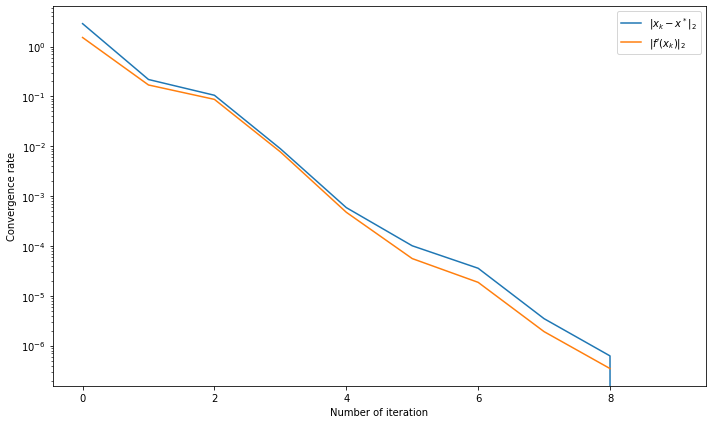

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.semilogy([np.linalg.norm(x - np.array(x_k)) for x_k in x_list], label=r"$\|x_k - x^*\|_2$")
plt.semilogy(normgrad, label=r"$\| f'(x_k) \|_2$")
plt.xlabel("Number of iteration")
plt.ylabel("Convergence rate")
plt.legend(loc="best")
plt.tight_layout()

from the plot above we can see a **linear** convergence with convergence speed equal to 8. 

- (2 pts) Find spectrum of the matrix $A$ with a proper ```numpy``` function and compare the derived convergence plot with theoretical upper bound. How is the theoretical upper bound tight?

In [8]:
# spectrum of the matrix 𝐴:
spectrum, a = np.linalg.eig(A)
spectrum

array([0.52, 0.94, 0.88, 0.76])

In [9]:
np.linalg.norm(x_list[8]-x)

6.247794779473658e-07

the convergence is linear and it has the upper boud as follows:
$$
\|x_{k+1} - x^*\|_2\leq Cq^k, \quad where \ q \in (0, 1)
$$

$$
\kappa ≈ \frac {max(spectrum)} {min(spectrum)} = \frac {0.94} {0.52} ≈ 1.8
$$

therefore, 
$$
q = \frac{\kappa-1} {\kappa+1} = \frac {1.8-1} {1.8 + 1} ≈ 0.29 
$$



In [10]:
pow(0.29,8)

5.002464129609997e-05

if we take C = 1, k = 8: 

$$
Cq^k = 1* (0,29)^8 ≈ 5*10^{-5} > 6e-07
$$
we can see, that it satisfies our inequalities and 100 times far from the upper bound!

## Problem 3 

- (1 pts) Consider the simple binary classification problem of data taken with [this utility](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). So the first step in this problem is downlowding the dataset and derive matrix $X \in \mathbb{R}^{m \times n}$ of given data and vector $y \in \mathbb{R}^m$ of labels. 
- Now to train the simple logistic regression model you need to solve the following optimization problem

$$ -\frac{1}{m} \sum_{i=1}^m (y_i \log(h(w, b | x_i)) + (1 - y_i)\log(1 - h(w, b | x_i))) \to \min_{w, b},$$

where $y_i$ is an $i$-th label, $x_i$ is an $i$-th row of the matrix $X$, $h(w, b | x_i) = \sigma(w^{\top}x_i + b)$ (here we use $x_i$ as a column vector) and $\sigma(z) = \frac{1}{1 + e^{-z}}$. This problem has two parameter $w \in \mathbb{R}^n$ and $b \in \mathbb{R}$. It is possible to incorporate them in the single vector, so if you want, you can consider them as a components of the single vector.
    
The explanation of the form of the objective function and related topics on how to measure the quality of the trained model will be discussed in the machine learning course.



In [11]:
#pip install jax

In [12]:
#pip install jaxlib

In [13]:
import jax
import sklearn.datasets as skldata
from sklearn.datasets import load_breast_cancer
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [14]:
data = skldata.load_breast_cancer()
X = data['data']
y = data['target']

data = load_breast_cancer()


- (5 pts) Implement the gradient of this objective function and compare your implementation with automatically computed gradient in JAX. Loops are prohibited in your implementation!


In [15]:
#  w and b are incorporated in the single vector X:
X = jax.numpy.c_[np.ones(X.shape[0]), X] 

In [16]:
import jax
import numpy
import sklearn.datasets as skldata

# X normalization
X = X / X.max(axis=0)

numpy.random.seed(20)
W = numpy.random.uniform(0, 1, X.shape[1])

In [17]:
X.shape

(569, 31)

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

derivative of the sigmoid:
$$
\frac{d\sigma(z)}{dz} = \sigma(z)(1-\sigma(z))
$$

derivative of the loss function, assuming that z after incorporating in the single vector the variables w and b, is only depend on x and w in formula below:

$$
\frac{\partial L}{\partial w_i} = - \frac{\partial [y_i log(\sigma(z))+(1-y_i) log (1-\sigma(z))]}{\partial w_i} = -  (y_i(1-\sigma(z)) - \sigma(z) + y_i\sigma(z)) * \frac{\sigma(z)}{\partial w_i} = (\sigma(z) - y_i)* \frac{\sigma(z)}{\partial w_i}
$$


$$
∇L_w = \frac {1} {m} \sum_{i=1}^m (σ(w^Tx_i)-y_i)x_i
$$

In [18]:
def sigmoid(w, x):
  return 1 / (1 + jax.numpy.exp(-w @ x.T))   


def log_loss(x, s, w):
  return -1 / X.shape[0] * sum(s * jax.numpy.log(sigmoid(w, x)) \
                           +  (1 - s) * jax.numpy.log(1 - sigmoid(w, x)))


def analitical_grad(x, s, w):  
  return 1/X.shape[0]*((sigmoid(w, x) - s).T @ x)

In [19]:
jax_grad = jax.grad(log_loss, argnums=2, has_aux=False)
diff = jax.numpy.linalg.norm(jax_grad(X,y,W) - analitical_grad(X,y,W))
print("Norm of Gradient is different from automatically computed gradient in JAX for small value",  diff)

Norm of Gradient is different from automatically computed gradient in JAX for small value 6.978543e-05


In [20]:
jax.numpy.linalg.norm(analitical_grad(X,y,W))

DeviceArray(0.9776256, dtype=float32)

- (5 pts) Consider four constant step sizes $10^{-3}, 10^{-2}, 10^{-1}, 1$ and compare the convergence of the gradient descent for them. Also fix the initialization in every run. You should get three convergence plots and analyze them.



In [21]:
from jax import grad
from timeit import timeit

In [22]:
data = skldata.load_breast_cancer()
X = data['data']
y = data['target']

data = load_breast_cancer()

In [23]:
X = jax.numpy.c_[np.ones(X.shape[0]), X] 

In [24]:
# X normalization
X = X / X.max(axis=0)
numpy.random.seed(20)
W = numpy.random.uniform(0, 1, X.shape[1])

In [25]:
w0 = np.zeros(X.shape[1])

In [26]:
def GradientDescent(n_iter, step, tol, w0, X, y):
    w = w0
    log_cost = float(log_loss(X, y, w))
    cost_list = [log_cost]

    for i in range(n_iter):
        w = w - step * analitical_grad(X, y, w)
        log_cost = float(log_loss(X, y, w))
        cost_list.append(log_cost)
        if np.linalg.norm(cost_list) < tol:
            break
    return cost_list

In [27]:
n_iter = 5000
step_1 = 1e-3
step_2 = 1e-2
step_3 = 1e-1
step_4 = 1.0
tol = 1e-8
w0 = np.zeros(X.shape[1])

In [28]:
import timeit
#%time GradientDescent(n_iter, step_1, tol, w0, X, y)
#%time GradientDescent(n_iter, step_2, tol, w0, X, y)
#%time GradientDescent(n_iter, step_3, tol, w0, X, y)
#%time GradientDescent(n_iter, step_4, tol, w0, X, y)

In [ ]:
grad1 = GradientDescent(n_iter, step_1, tol, w0, X, y)
grad2 = GradientDescent(n_iter, step_2, tol, w0, X, y)
grad3 = GradientDescent(n_iter, step_3, tol, w0, X, y)
grad4 = GradientDescent(n_iter, step_4, tol, w0, X, y)

In [ ]:
plt.plot(grad1, color='b', label='{1e-3}')
plt.plot(grad2, color='g', label='{1e-2}')
plt.plot(grad3, color='y', label='{1e-1}')
plt.plot(grad4, color='r', label='{1e-0}')
plt.xticks()
plt.yticks()
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.title('Convergence for const step size (JAX)')
plt.legend(loc="best")


convergence in case when step is equal to 1 is the fastest.

- (3 pts) Compare the obtained results with the results if Armijo rule to adapt the step size is used. Provide convergence plots and running time in seconds in all experiments.

In [ ]:
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

In [ ]:
data = skldata.load_breast_cancer()
X = data['data']
y = data['target']

data = load_breast_cancer()

In [ ]:
X = np.c_[np.ones(X.shape[0]), X] 
X = X / X.max(axis=0)
numpy.random.seed(20)
w0 = numpy.random.randn(X.shape[1])


In [ ]:
def sigmoid2(w, x):
  return 1 / (1 + np.exp(-w @ x.T))  

In [ ]:
f = lambda w: -1 / X.shape[0] * sum(y * np.log(sigmoid2(w, X)) \
                           +  (1 - y) * np.log(1 - sigmoid2(w, X)))

In [ ]:
grad_f = lambda w: 1/X.shape[0]*((sigmoid2(w, X) - y).T @ X)

In [ ]:
beta = 0.3
rho=0.9
init_alpha =1.

In [ ]:
gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho = rho, beta = beta, init_alpha = init_alpha))

In [ ]:
%time w = gd.solve(w0, tol=1e-3, max_iter=5000, disp=True)
w = gd.solve(w0, tol=1e-3, max_iter=5000, disp=True)

In [ ]:
x_conv = gd.get_convergence()
grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.title(f'beta = {beta},rho = {rho}, init_alpha = {init_alpha},')
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.grid(True)
plt.tight_layout()

(2 pts) Make a conclusion on the gain that can be established by the proper adaptive step size selection rules

### result: 
when number of iteration is equal to 5000, in GD method we achieved around 0.1 convergence rate when alpha is equal to 1, but when by using the Armijo rule to adapt the step size  we achieved 100 times gain, with beta = 0.3, rho = 0.9 and alpha = 2. Time spent for calculation is also faster.


*additional comparison

In [ ]:

beta = 0.3
rho=0.91
init_alpha =2e-1

data = skldata.load_breast_cancer()
X = data['data']
y = data['target']

data = load_breast_cancer()

X = np.c_[np.ones(X.shape[0]), X] 
X = X / X.max(axis=0)
numpy.random.seed(20)
w0 = numpy.random.randn(X.shape[1])

gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho = rho, beta = beta, init_alpha = init_alpha))
%time w = gd.solve(w0, tol=1e-3, max_iter=5000, disp=True)
w = gd.solve(w0, tol=1e-3, max_iter=5000, disp=True)
x_conv = gd.get_convergence()
grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.title(f'beta = {beta},rho = {rho}, init_alpha = {init_alpha},')
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.grid(True)
plt.tight_layout()

 when alpha is chnaged from 2 to 2e-1, the convergence rate is increased almost 8 times. Choice of the proper alpha is also important for better convergence